# Prueba 1

<IPython.core.display.Javascript object>


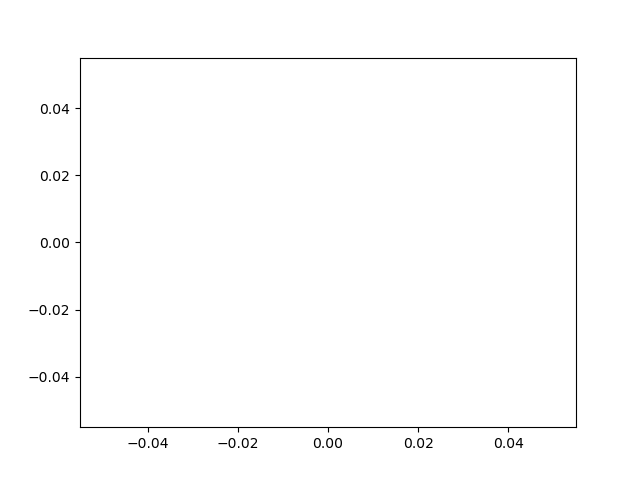

Exception in thread Thread-6:
Traceback (most recent call last):
  File "C:\Anaconda\envs\tfg-fises\lib\threading.py", line 926, in _bootstrap_inner
    self.run()
  File "C:\Anaconda\envs\tfg-fises\lib\threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-6-042f2437f9ab>", line 29, in thread_f
    while flag:
NameError: name 'flag' is not defined



In [6]:
%matplotlib notebook

from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from random import randrange
from threading import Thread
import time

class LiveGraph:
    def __init__(self):
        self.x_data, self.y_data = [], []
        self.figure = plt.figure()
        self.line, = plt.plot(self.x_data, self.y_data)
        self.animation = FuncAnimation(self.figure, self.update, interval=1000)
        self.th = Thread(target=self.thread_f, daemon=True)
        self.th.start()

    def update(self, frame):
        self.line.set_data(self.x_data, self.y_data)
        self.figure.gca().relim()
        self.figure.gca().autoscale_view()
        return self.line,

    def show(self):
        plt.show()

    def thread_f(self):
        x = 0
        while flag:
            self.x_data.append(x)
            x += 1
            self.y_data.append(randrange(0, 100))   
            time.sleep(1)  

g = LiveGraph()
g.show()

Traceback (most recent call last):
  File "C:\Anaconda\envs\tfg-fises\lib\site-packages\matplotlib\cbook\__init__.py", line 196, in process
    func(*args, **kwargs)
  File "C:\Anaconda\envs\tfg-fises\lib\site-packages\matplotlib\animation.py", line 1467, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


Button(description='Click Me!', style=ButtonStyle())

Output()

Una vez clicado tarda en cargar, sobre todo la primera vez.


<IPython.core.display.Javascript object>


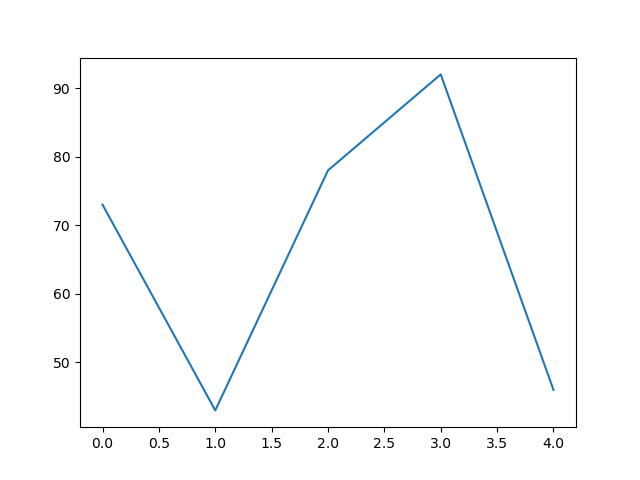

In [7]:
%matplotlib notebook

import ipywidgets as widgets
from IPython.display import display
button = widgets.Button(description="Click Me!")
output = widgets.Output()
global flag
flag = False

display(button, output)

def on_button_clicked(b):
    global flag
    if(flag):
        flag = False
    else:
        flag = True

button.on_click(on_button_clicked)
print("Una vez clicado tarda en cargar, sobre todo la primera vez.")

from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from random import randrange
from threading import Thread
import time
class LiveGraph:
    def __init__(self):
        self.x_data, self.y_data = [], []
        self.figure = plt.figure()
        self.line, = plt.plot(self.x_data, self.y_data)
        self.animation = FuncAnimation(self.figure, self.update, interval=1000)
        self.th = Thread(target=self.thread_f, daemon=True)
        self.th.start()

    def update(self, frame):
        self.line.set_data(self.x_data, self.y_data)
        self.figure.gca().relim()
        self.figure.gca().autoscale_view()
        return self.line,

    def show(self):
        plt.show()

    def thread_f(self):
        x = 0
        while True:
            if(flag):
                self.x_data.append(x)
                x += 1
                self.y_data.append(randrange(0, 100))   
                time.sleep(1)  

g = LiveGraph()
g.show()

In [3]:
print(flag)

False


<IPython.core.display.Javascript object>


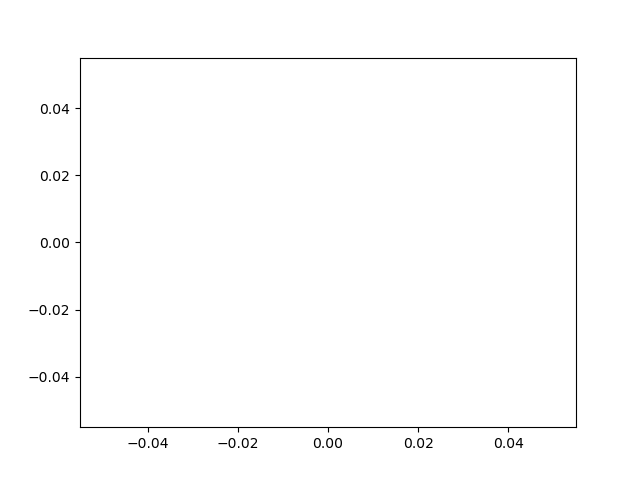

Button(description='Click Me!', style=ButtonStyle())

Output()

In [8]:
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from random import randrange
from threading import Thread
import time
class LiveGraph:
    def __init__(self):
        self.x_data, self.y_data = [], []
        self.figure = plt.figure()
        self.line, = plt.plot(self.x_data, self.y_data)
        self.animation = FuncAnimation(self.figure, self.update, interval=1000)
        self.th = Thread(target=self.thread_f, daemon=True)
        self.th.start()

    def update(self, frame):
        self.line.set_data(self.x_data, self.y_data)
        self.figure.gca().relim()
        self.figure.gca().autoscale_view()
        return self.line,

    def show(self):
        display(button, output)
        plt.show()

    def thread_f(self):
        x = 0
        while flag:
            self.x_data.append(x)
            x += 1
            self.y_data.append(randrange(0, 100))   
            time.sleep(1)  

g = LiveGraph()

g.show()

---

# Prueba 2


In [1]:
import math
from random import gauss

N = 100
media = 0
varianza = 10
t = 20
ye = []
for j in range(t):
    X = [gauss(media, math.sqrt(varianza)) for i in range(N)]
    Y = 0
    for i in range(N):
        Y = Y + X[i]
    #print(Y)
    ye.append(Y)

In [2]:
print(ye)

[-3.7169718439158124, -87.5759918333599, -20.040570668200026, -7.932133942614861, 19.95626102385206, 34.65425829053948, -16.78034602033806, -10.059463228398599, 29.64546176202405, -36.20110433264956, 15.010096394637355, 3.5147500394893636, 21.959616458481953, -25.82644372046222, -7.775048352355879, 34.678380297101235, 17.128215031336424, 22.20230864321917, 23.797024254784, -42.67083660139804]


In [2]:
%gui asyncio
import asyncio
def wait_for_change(widget, value):
    future = asyncio.Future()
    def getvalue(change):
        # make the new value available
        future.set_result(change.new)
        widget.unobserve(getvalue, value)
    widget.observe(getvalue, value)
    return future

In [3]:
from ipywidgets import IntSlider, Output
slider = IntSlider()
out = Output()

async def f():
    for i in range(t):
        out.append_stdout('did work ' + str(ye[i]) + '\n')
        x = await wait_for_change(slider, 'value')
asyncio.ensure_future(f())


<Task pending coro=<f() running at <ipython-input-3-1635d02bc134>:5>>

In [4]:
display(slider, out)

IntSlider(value=0)

Output(outputs=({'output_type': 'stream', 'name': 'stdout', 'text': 'did work -7.979160328341889\n'},))

In [5]:
def animate(i):
    graph_data = open('example.txt','r').read()
    lines = graph_data.split('\n')
    xs = []
    ys = []
    for line in lines:
        if len(line) > 1:
            x, y = line.split(',')
            xs.append(float(x))
            ys.append(float(y))
    ax1.clear()
    ax1.plot(xs, ys)
    
plt.show()


NameError: name 'plt' is not defined